In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
data = pd.read_csv("C:\\Users\\user\\Documents\\100 Days of ML Coding\\Project - Video Game Sales\\vgsales.csv")

In [3]:
print(data.shape)
data.head()

(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Horizontal Plot of Game Sales by Regions

In [51]:
def plot_sales(column):
    data1 = data.sort_values([column],ascending=False).head(5)
    y_tag = np.arange(len(list(data1["Name"])))
    plt.barh(y_tag, data1[column], color='navy')
    plt.yticks(y_tag, list(data1["Name"]))
    plt.title("Top 5 {}".format(column))
    plt.xlabel("Game Sales")
    plt.ylabel("Game")
    plt.show()

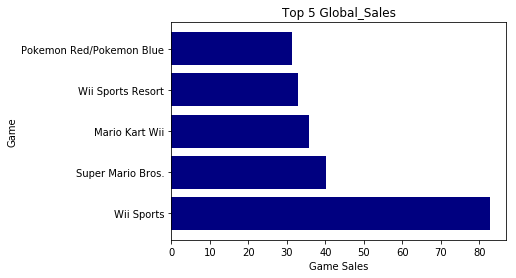

In [52]:
plot_sales("Global_Sales")

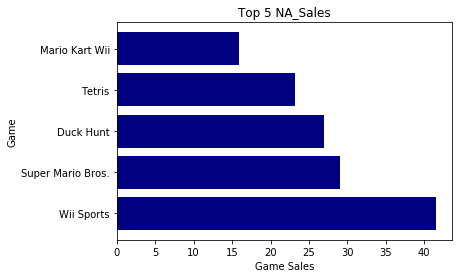

In [53]:
plot_sales("NA_Sales")

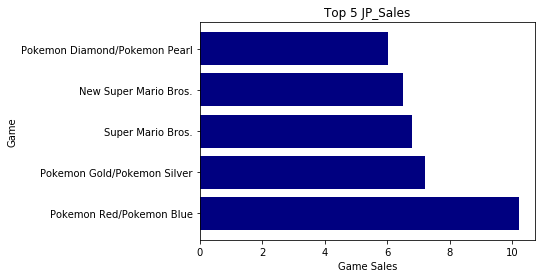

In [54]:
plot_sales("JP_Sales")

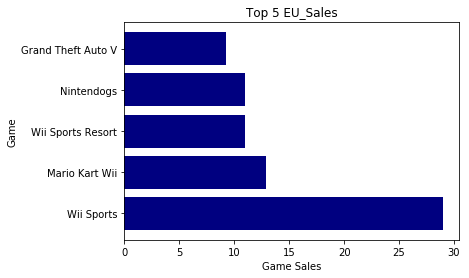

In [56]:
plot_sales("EU_Sales")

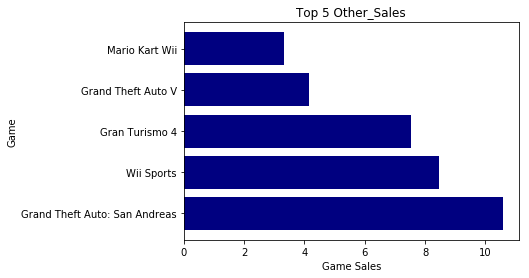

In [57]:
plot_sales("Other_Sales")

# Plot of Global Game Sales by Genre

In [66]:
data.groupby("Genre").count()[["Rank"]].sort_values(["Rank"], ascending=False)

,Rank
Genre,
Action,3316
Sports,2346
Misc,1739
Role-Playing,1488
Shooter,1310
Adventure,1286
Racing,1249
Platform,886
Simulation,867


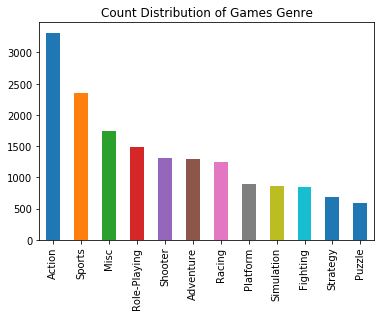

In [82]:
data["Genre"].value_counts().plot(kind='bar', title='Count Distribution of Games Genre')

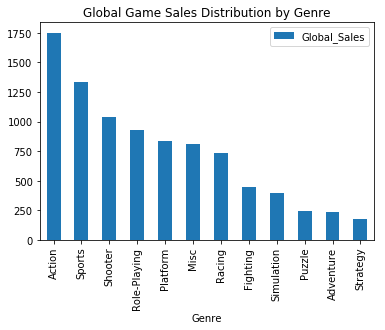

In [110]:
data1 = data.groupby("Genre").sum()[["Global_Sales"]].sort_values(["Global_Sales"], ascending=False)
data1.plot(kind='bar', title="Global Game Sales Distribution by Genre")

# Subplot of top 5 Games by Genre

In [4]:
data1=data.groupby(["Genre","Name"]).sum()[["Global_Sales"]].sort_values(["Genre","Global_Sales"], ascending=False)
data1a=data1.groupby(["Genre"]).head(5)
data1b=data1a.reset_index()
data1b

,Genre,Name,Global_Sales
0,Strategy,Pokemon Stadium,5.45
1,Strategy,Warzone 2100,5.01
2,Strategy,StarCraft II: Wings of Liberty,4.83
3,Strategy,Warcraft II: Tides of Darkness,4.21
4,Strategy,Pokémon Trading Card Game,3.70
5,Sports,Wii Sports,82.74
6,Sports,Wii Sports Resort,33.00
7,Sports,Wii Fit,22.72
8,Sports,Wii Fit Plus,22.00
9,Sports,FIFA 15,19.02


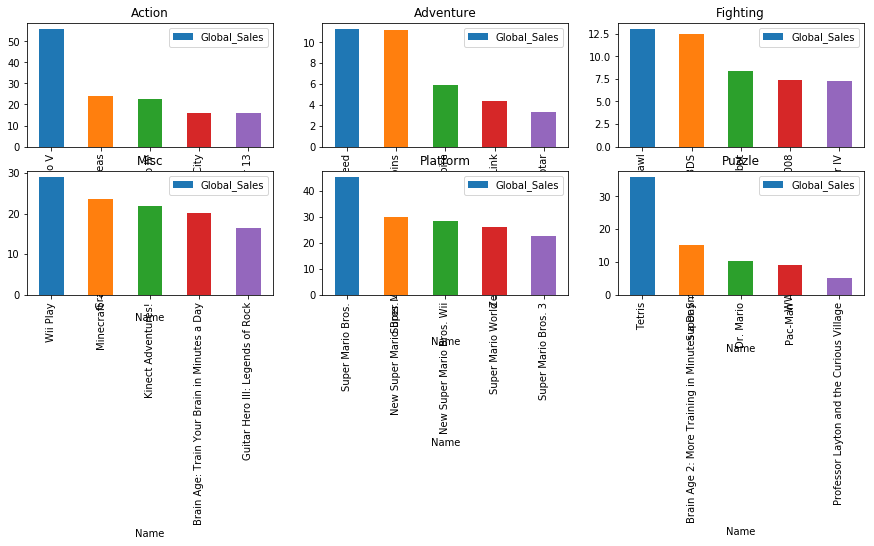

In [8]:
fig, axes = plt.subplots(2,3, figsize=(15,5))
for (Genre, group), ax in zip(data1b.groupby(data1b.Genre), axes.flatten()):
    group.plot(x='Name', y='Global_Sales', kind='bar', ax=ax, title=Genre)

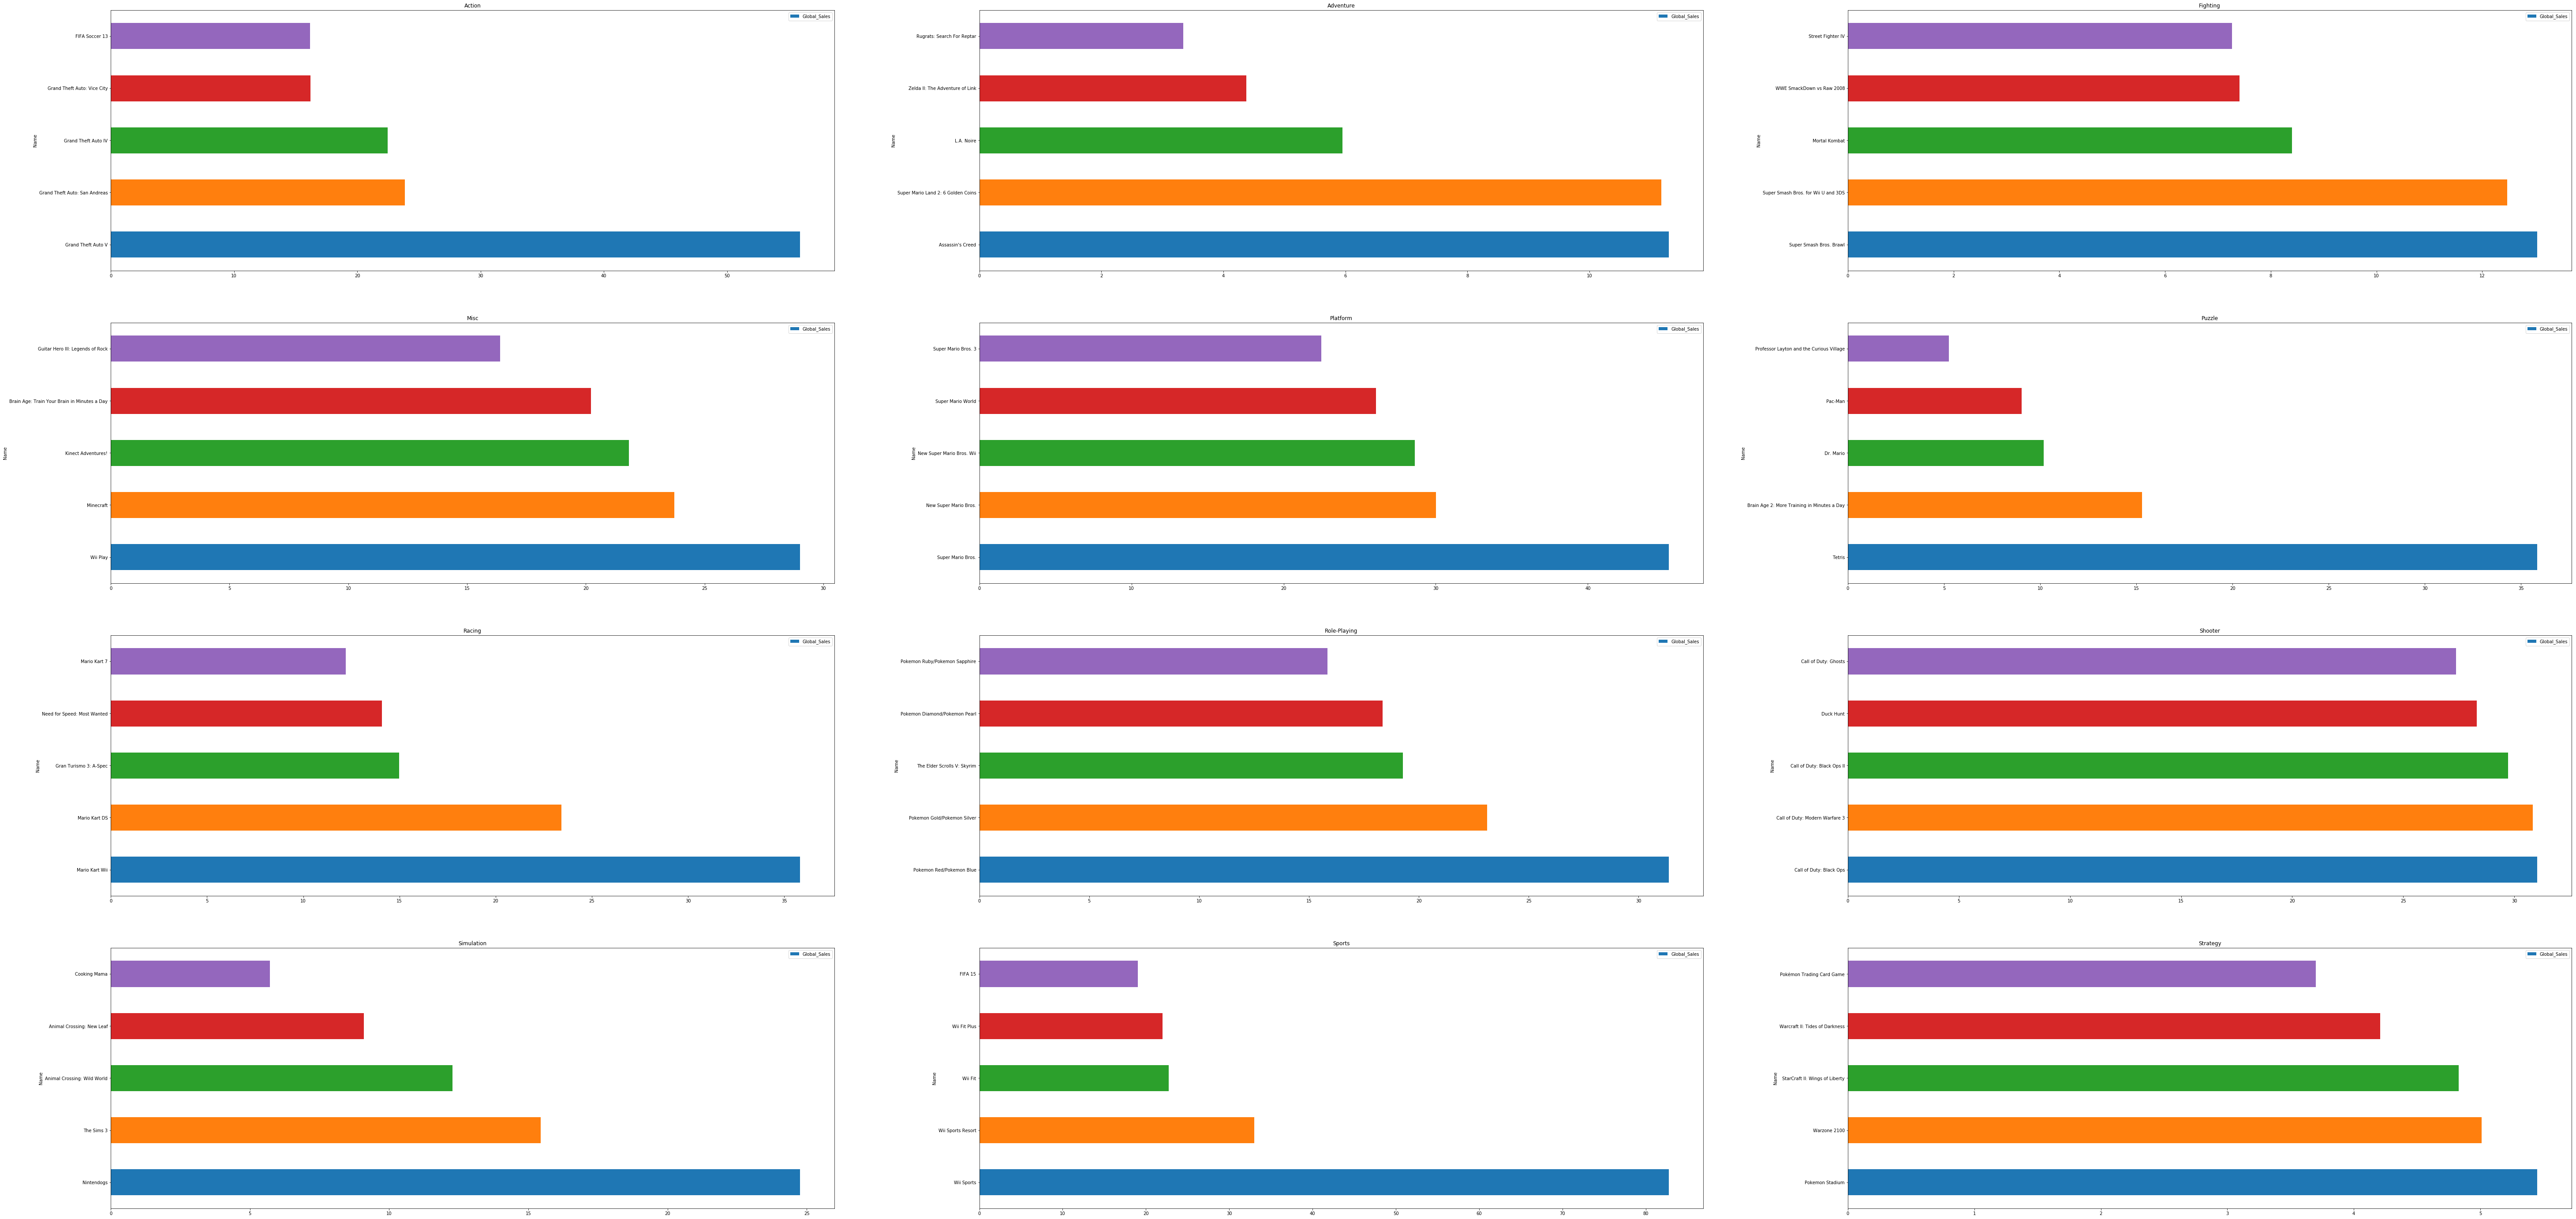

In [17]:
fig, axes = plt.subplots(4,3, figsize=(100,50))
for (Genre, group), ax in zip(data1b.groupby(data1b.Genre), axes.flatten()):
    group.plot(x='Name', y='Global_Sales', kind='barh', ax=ax, title=Genre)

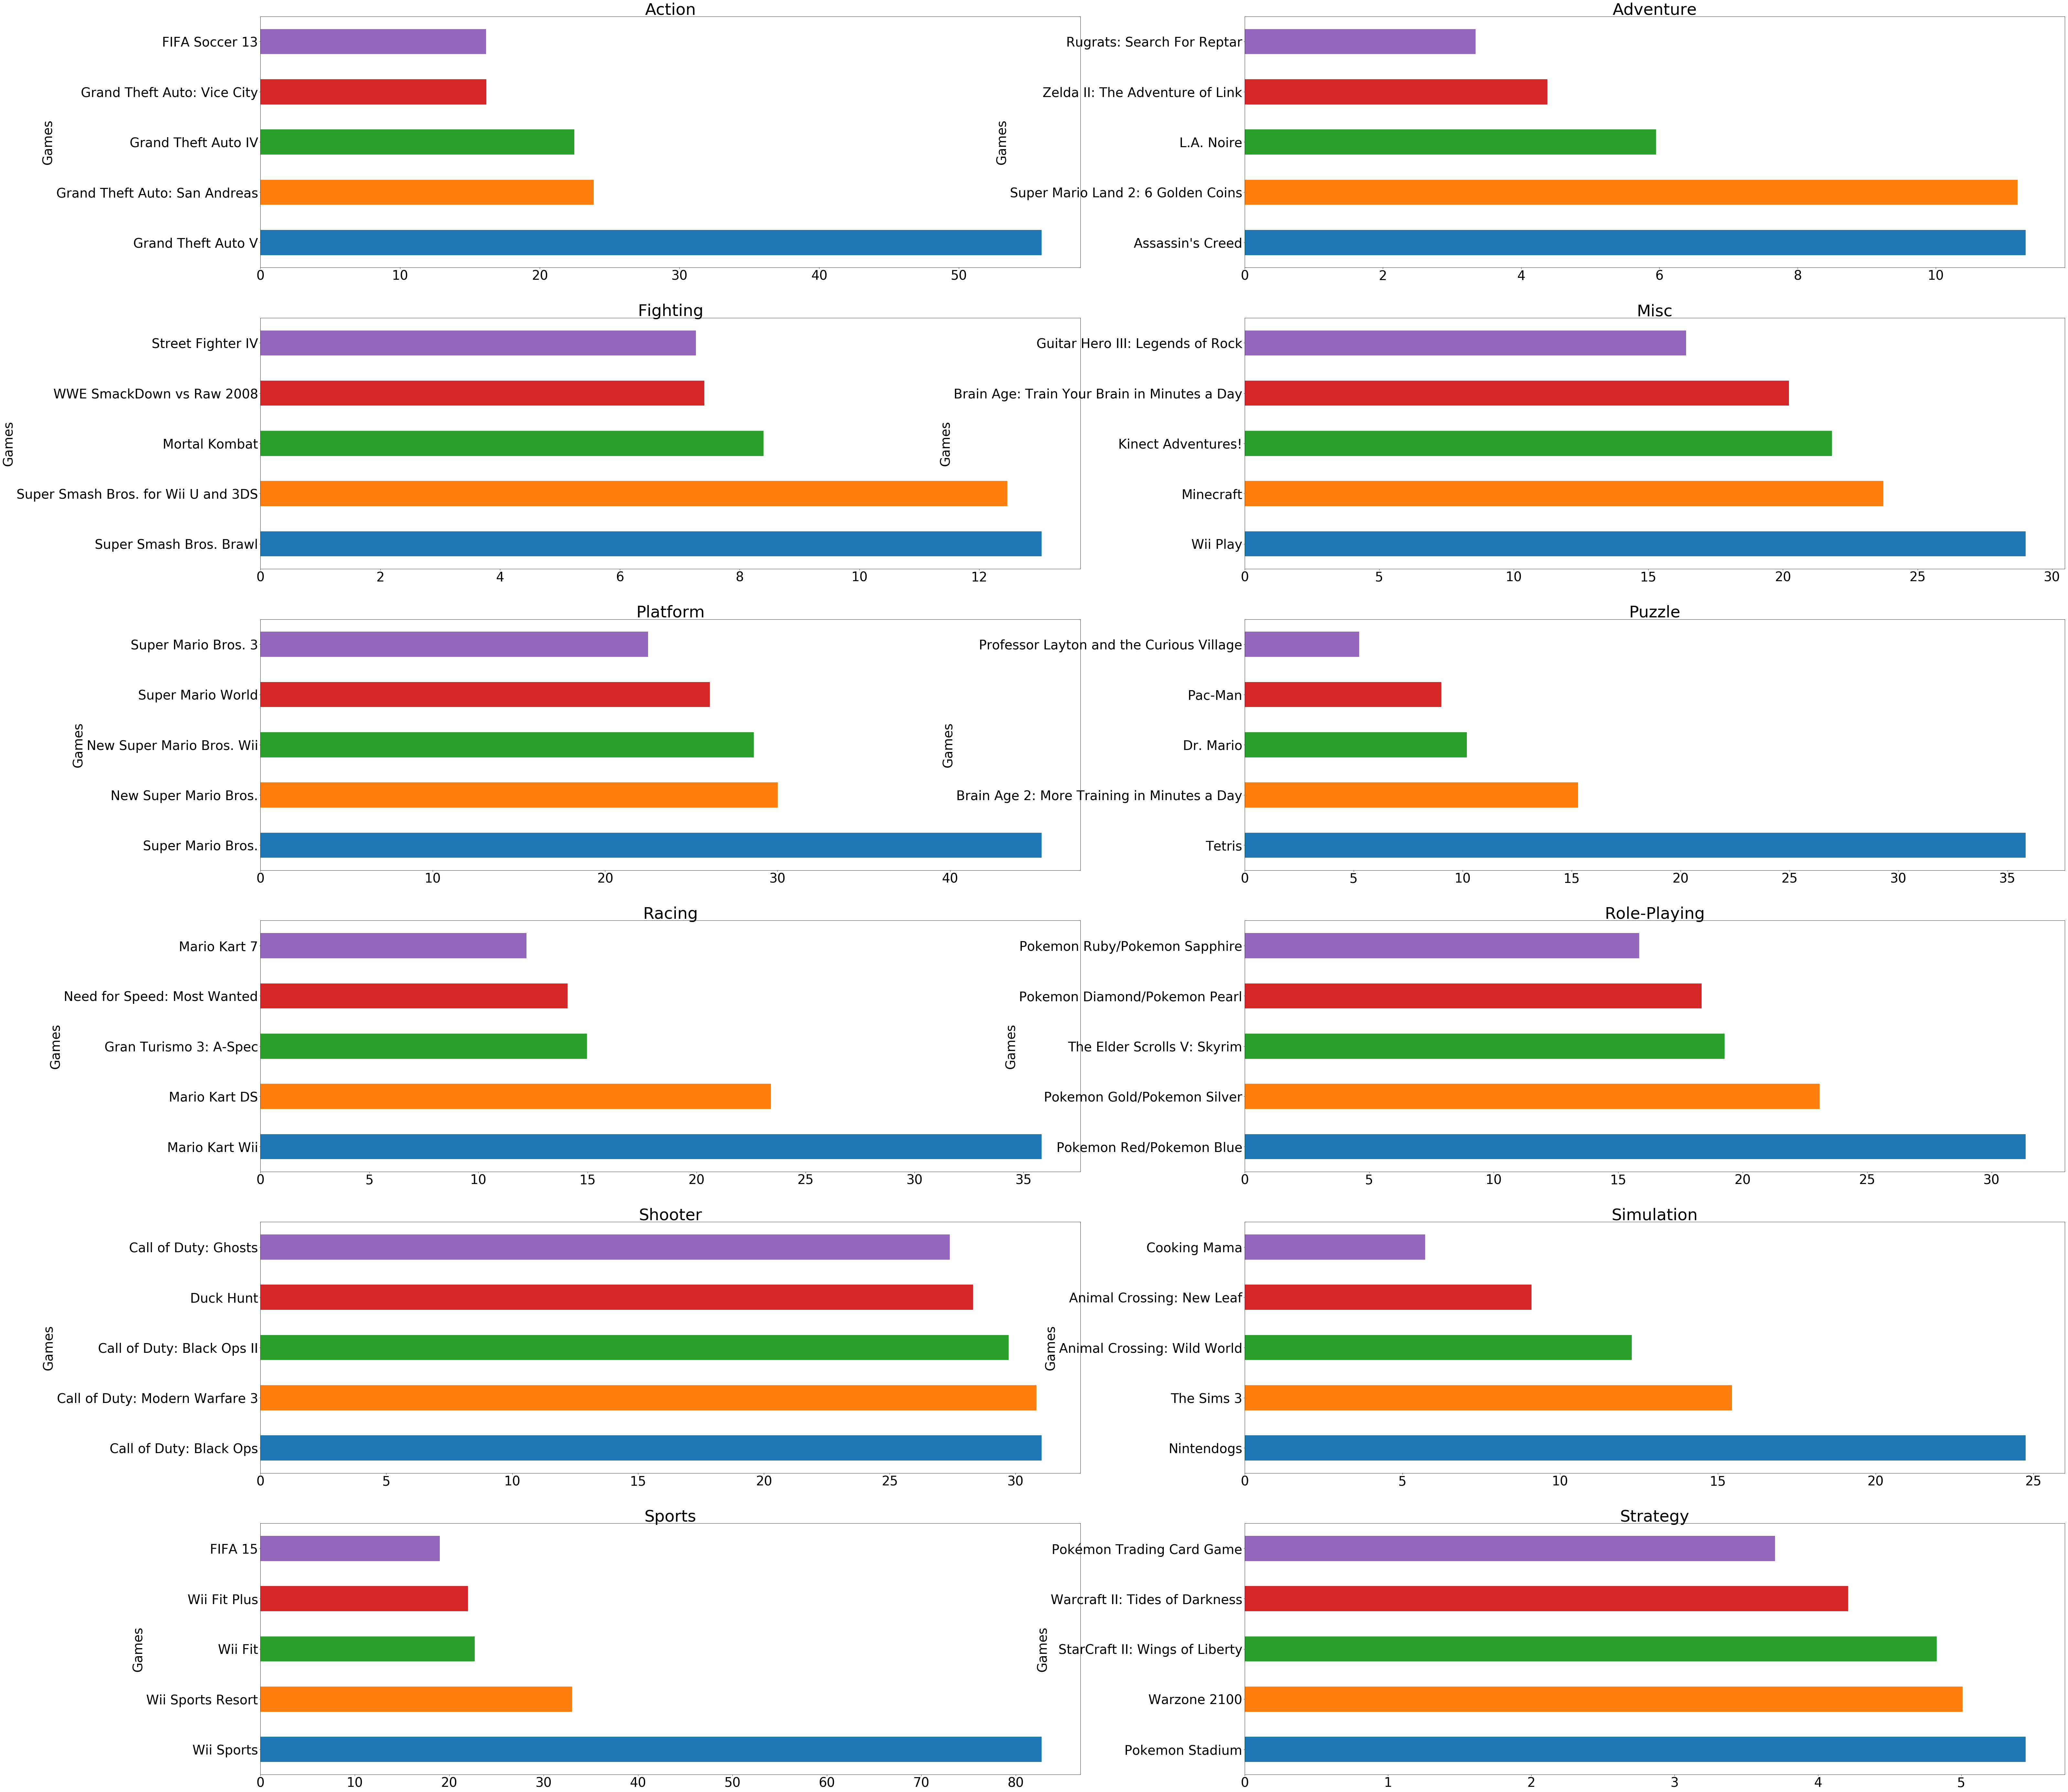

In [25]:
fig, axes = plt.subplots(6,2, figsize=(100,100))
for (Genre, group), ax in zip(data1b.groupby(data1b.Genre), axes.flatten()):
    group.plot(x='Name', y='Global_Sales', kind='barh', ax=ax, fontsize = 40.0, legend=False)
    ax.set_ylabel('Games', fontsize = 40.0)
    ax.set_title(Genre, fontsize = 50.0)

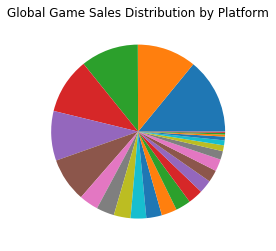

In [32]:
data2 = data.groupby("Platform").sum()[["Global_Sales"]].sort_values(["Global_Sales"], ascending=False)
plt.pie(data2["Global_Sales"])
plt.title("Global Game Sales Distribution by Platform")
plt.show()

In [33]:
data2

,Global_Sales
Platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49
PS,730.66
GBA,318.50
PSP,296.28
PS4,278.10


In [4]:
data.profile_report()

In [8]:
data.query('Year>2016')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01
